In [1]:
pip install ucimlrepo

In [5]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OrdinalEncoder

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

In [ ]:
df = pd.concat([X.iloc[:, :9], y['Diagnosis']], axis=1)

df = df.dropna(how='any')#удаление строкис пустым признаком

enc = OrdinalEncoder()
df[['Sex', 'Appendix_on_US']] = enc.fit_transform(df[['Sex', 'Appendix_on_US']])
df.head()


,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Diagnosis
0,12.68,16.9,0.0,148.0,37.0,3.0,4.0,3.0,1.0,appendicitis
1,14.10,31.9,1.0,147.0,69.5,2.0,5.0,4.0,0.0,no appendicitis
2,14.14,23.3,0.0,163.0,62.0,4.0,5.0,3.0,0.0,no appendicitis
3,16.37,20.6,0.0,165.0,56.0,3.0,7.0,6.0,0.0,no appendicitis
4,11.08,16.9,0.0,163.0,45.0,3.0,5.0,6.0,1.0,appendicitis


In [60]:
# Импортируем библиотеки
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# размер датасета, 705 записей, 10 столбцов
df.shape

(705, 10)

In [ ]:
# отображаем первые 10 сстрок датасета

df.head(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Diagnosis
0,12.68,16.9,0.0,148.0,37.0,3.0,4.0,3.0,1.0,appendicitis
1,14.10,31.9,1.0,147.0,69.5,2.0,5.0,4.0,0.0,no appendicitis
2,14.14,23.3,0.0,163.0,62.0,4.0,5.0,3.0,0.0,no appendicitis
3,16.37,20.6,0.0,165.0,56.0,3.0,7.0,6.0,0.0,no appendicitis
4,11.08,16.9,0.0,163.0,45.0,3.0,5.0,6.0,1.0,appendicitis
5,11.05,30.7,1.0,121.0,45.0,3.0,6.0,7.0,0.0,no appendicitis
6,8.98,19.4,0.0,140.0,38.5,3.0,5.0,6.0,0.0,no appendicitis
8,7.90,15.7,1.0,131.0,26.7,3.0,7.0,6.0,1.0,no appendicitis
9,14.34,14.9,1.0,174.0,45.5,3.0,4.0,4.0,1.0,appendicitis
10,11.87,15.7,1.0,147.0,34.0,2.0,8.0,9.0,1.0,appendicitis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            705 non-null    float64
 1   BMI                            705 non-null    float64
 2   Sex                            705 non-null    float64
 3   Height                         705 non-null    float64
 4   Weight                         705 non-null    float64
 5   Length_of_Stay                 705 non-null    float64
 6   Alvarado_Score                 705 non-null    float64
 7   Paedriatic_Appendicitis_Score  705 non-null    float64
 8   Appendix_on_US                 705 non-null    float64
 9   Diagnosis                      705 non-null    object 
dtypes: float64(9), object(1)
memory usage: 60.6+ KB


In [ ]:
df.describe()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,11.284567,18.835622,0.520567,147.891206,43.052071,4.225532,5.896454,5.229787,0.663830
std,3.505214,4.382573,0.499931,19.728793,17.364897,2.525759,2.154356,1.958654,0.472733
min,0.000000,7.830000,0.000000,53.000000,3.960000,1.000000,0.000000,0.000000,0.000000
25%,9.190000,15.700000,0.000000,136.000000,30.000000,3.000000,4.000000,4.000000,0.000000
50%,11.380000,17.930000,1.000000,149.000000,41.000000,3.000000,6.000000,5.000000,1.000000
75%,13.900000,21.000000,1.000000,163.000000,54.000000,5.000000,8.000000,6.000000,1.000000
max,17.870000,38.160000,1.000000,192.000000,103.000000,28.000000,10.000000,10.000000,1.000000


In [ ]:
df['Diagnosis'].unique()

array(['appendicitis', 'no appendicitis'], dtype=object)

In [ ]:
df['Diagnosis'].value_counts()

Diagnosis
appendicitis       413
no appendicitis    292
Name: count, dtype: int64

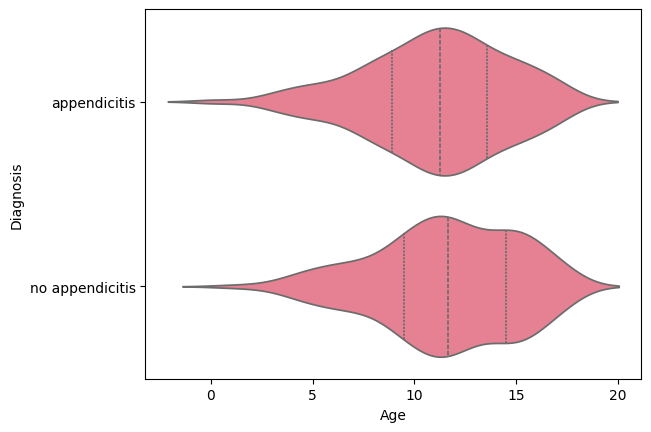

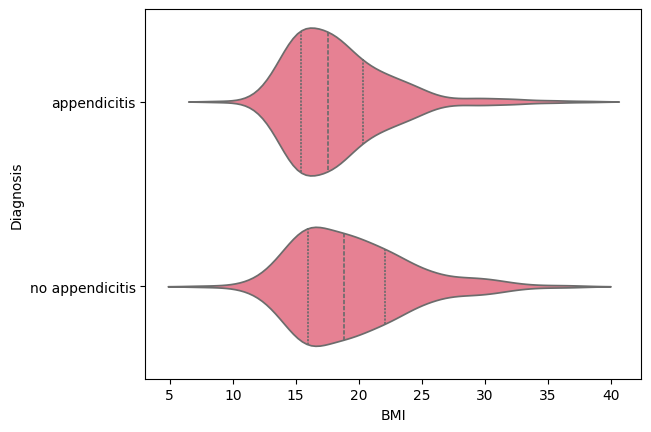

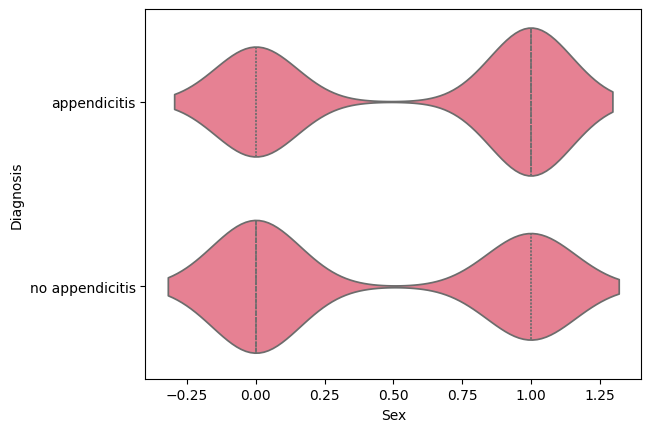

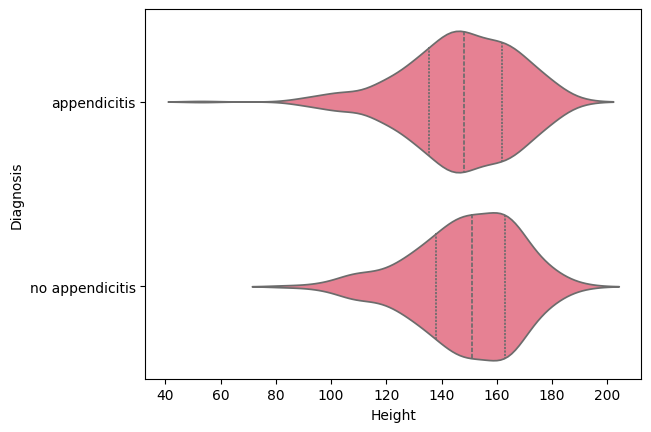

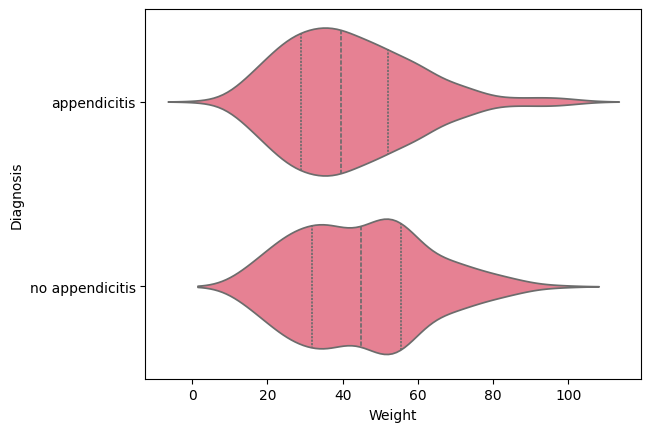

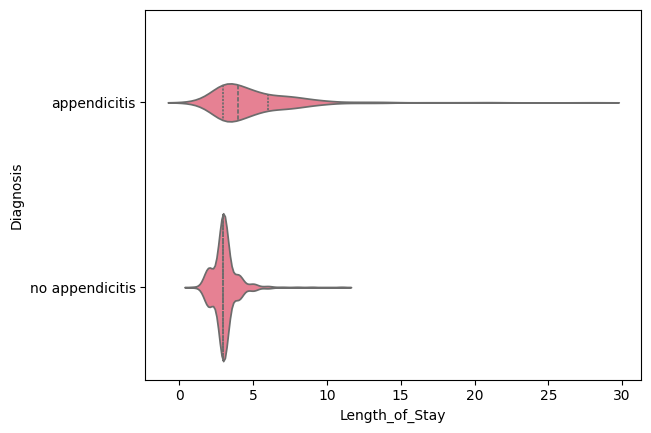

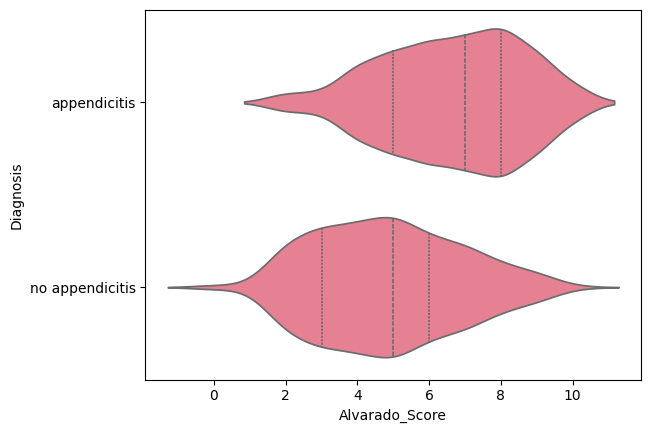

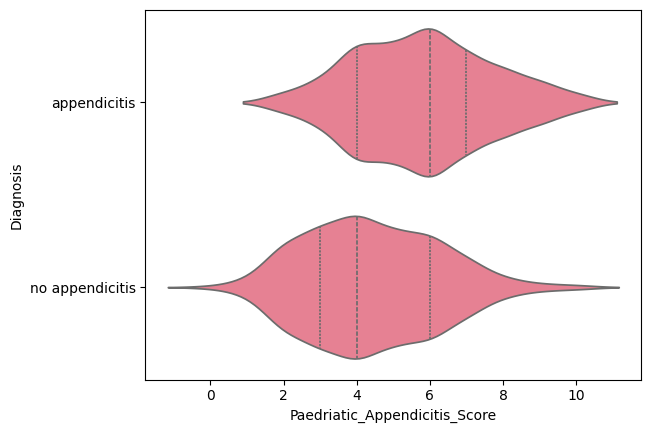

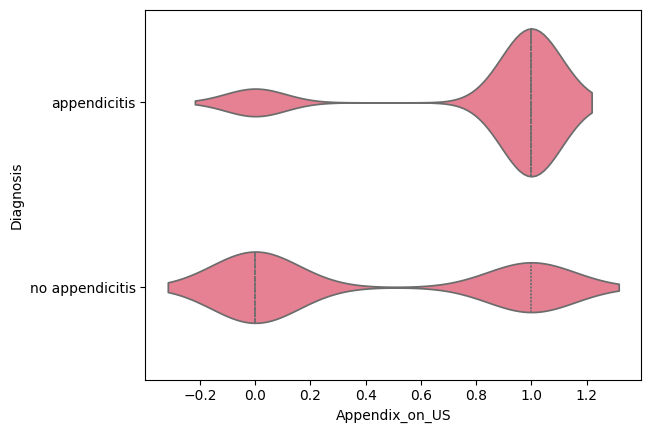

In [ ]:
sns.violinplot(y='Diagnosis', x='Age', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='BMI', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='Sex', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='Height', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='Weight', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='Length_of_Stay', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='Alvarado_Score', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='Paedriatic_Appendicitis_Score', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Diagnosis', x='Appendix_on_US', data=df, inner='quartile')
plt.show()

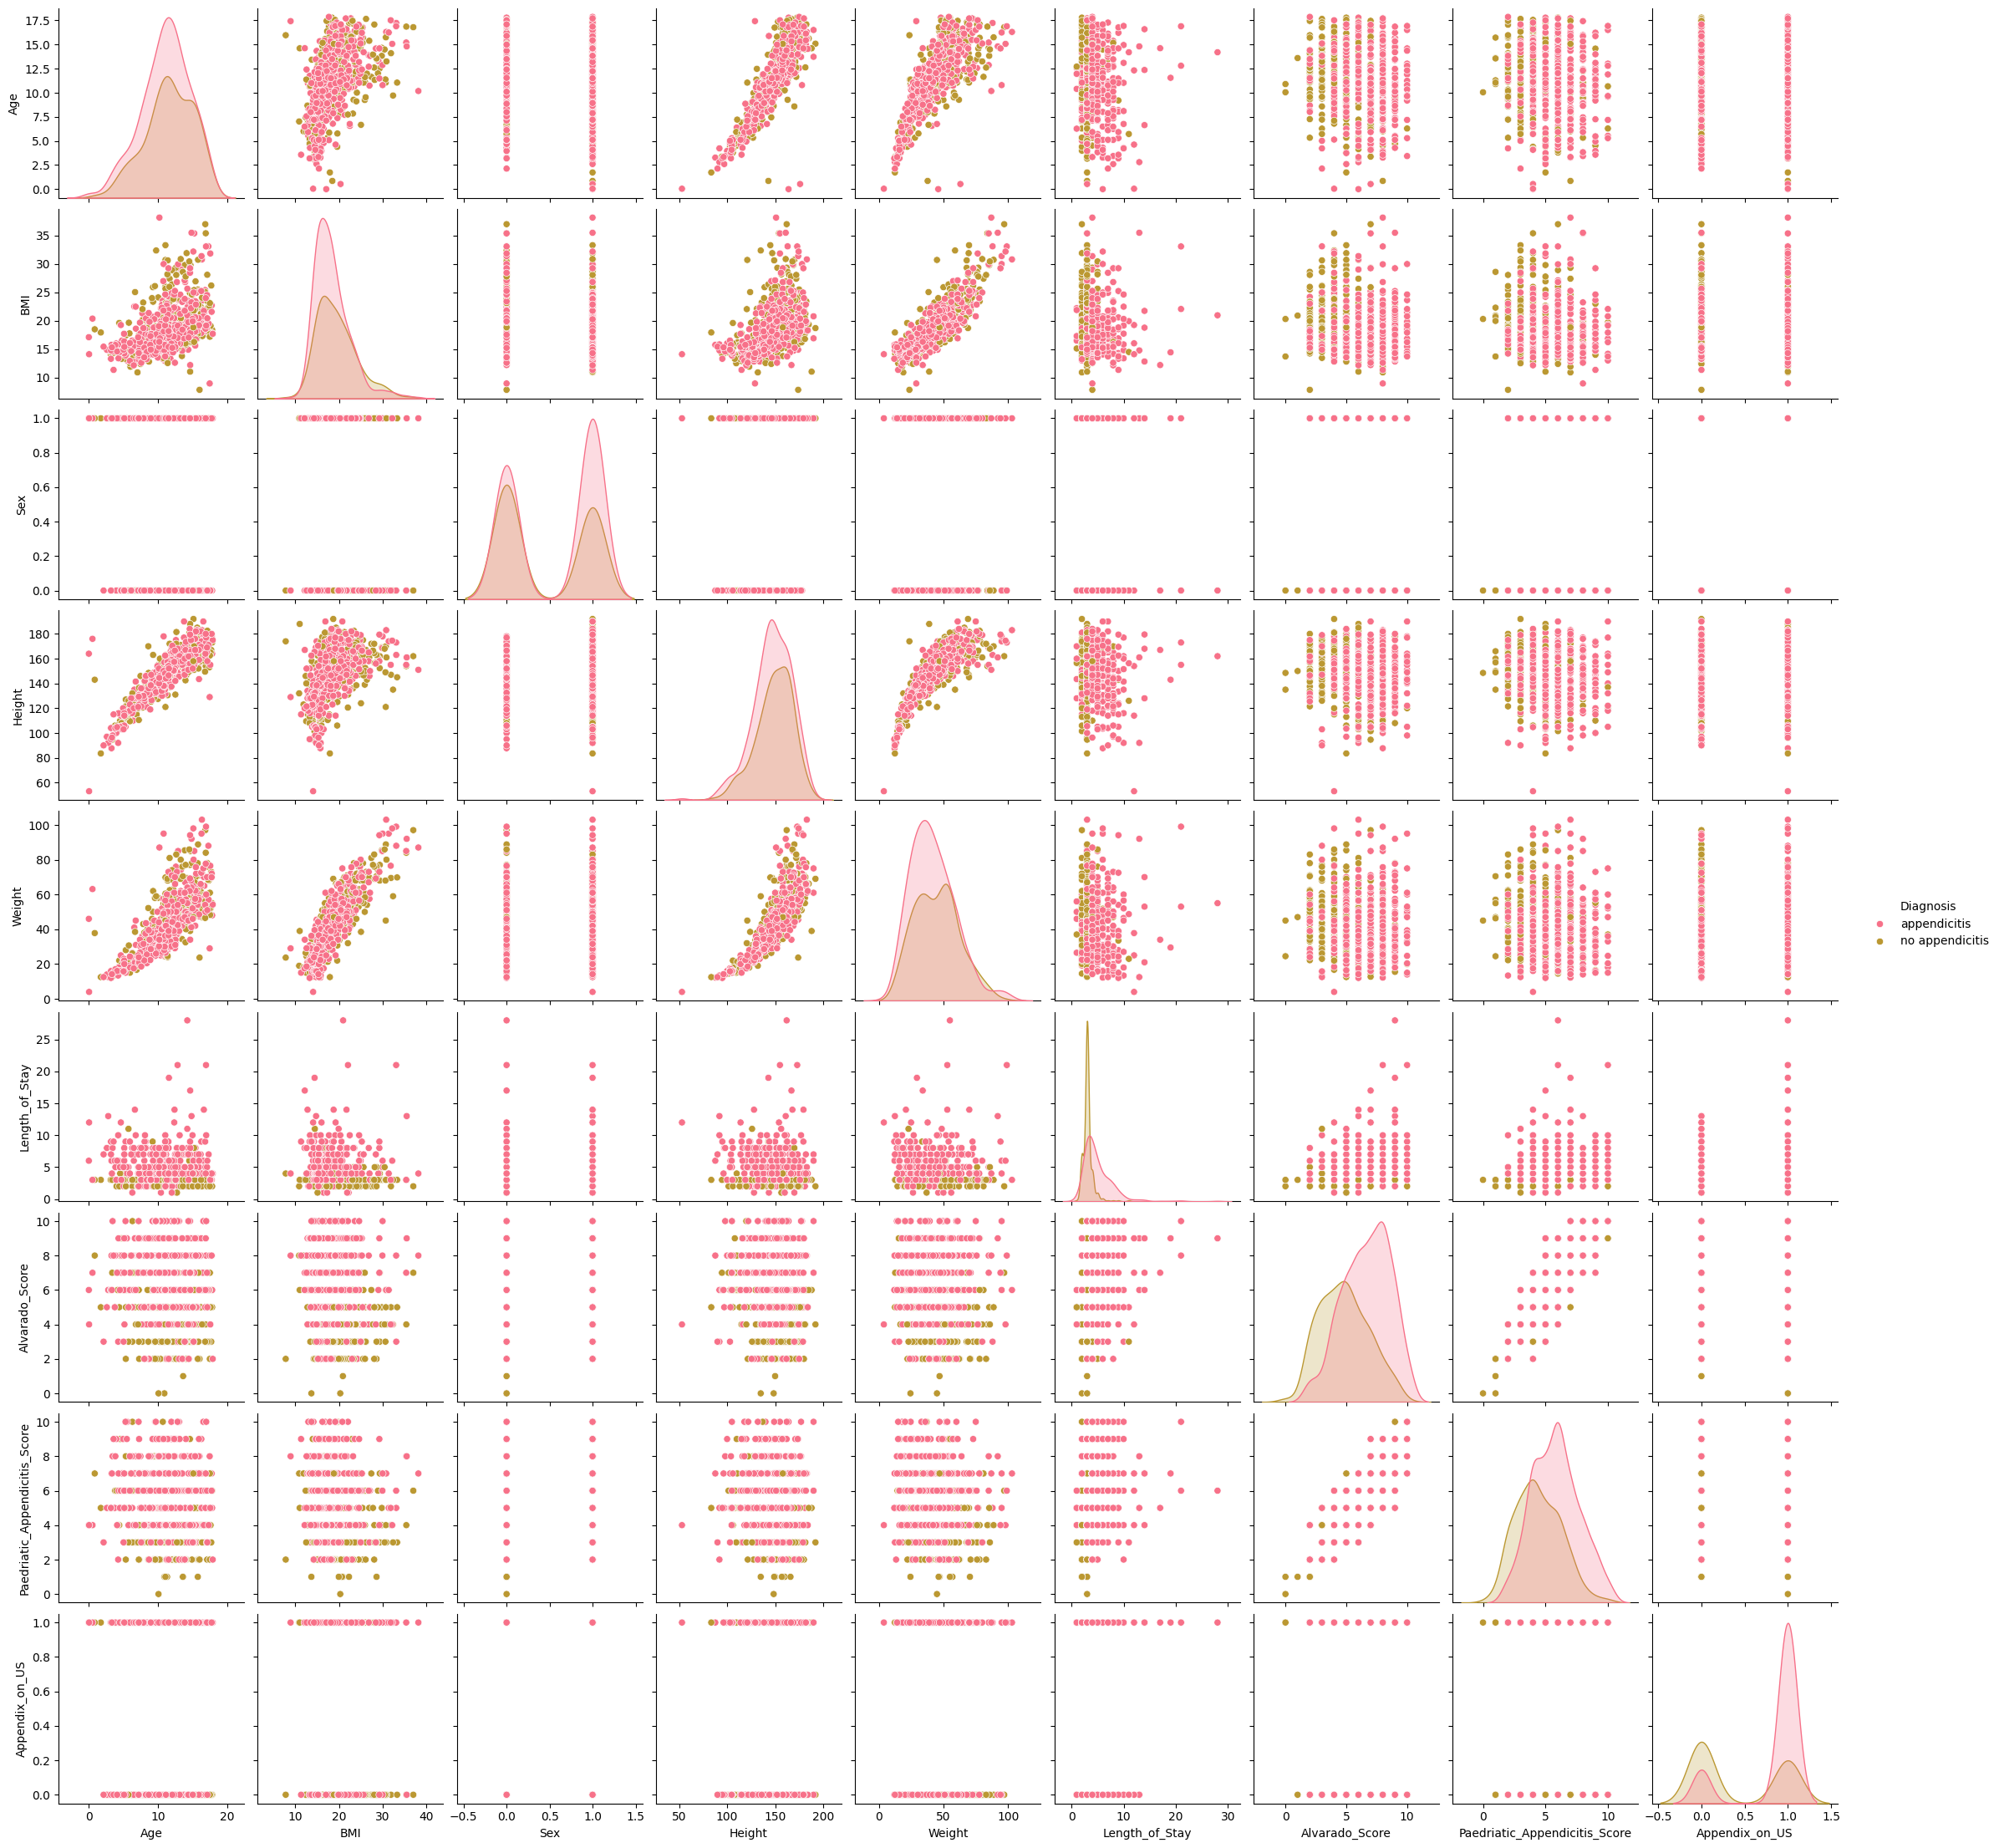

In [ ]:
sns.pairplot(df, hue='Diagnosis')

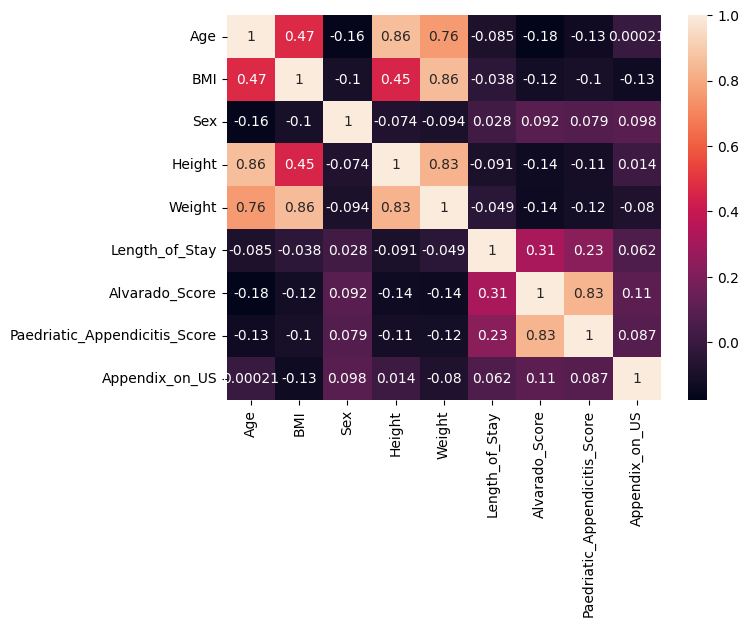

In [ ]:

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных


In [ ]:

X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (705, 9) | y shape: (705,) 


X имеет 705 строк и 9 столбцов, тогда как Y имеет 705 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
import scipy.stats as stats

y_mapped = y.map({'no appendicitis':0, 'appendicitis':1})

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.30, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-16.682741226425794, pvalue=6.834571601971963e-53, df=703.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.07635069797197336, pvalue=0.9391618153092267, df=703.0)

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.817575 (0.035326)
LDA: 0.805232 (0.042069)
KNN: 0.650940 (0.044448)
CART: 0.769580 (0.044253)
NB: 0.776754 (0.044881)
SVC: 0.634900 (0.052288)


Линейная регрессия показала лучшую метрику

# Обучение модели

In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.7730496453900709
sk LDA prediction: [0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1]
sk transformed features
[[ 0.44004009 -2.36745375 -1.5987353  -1.28763209 -7.28981021]]


<Axes: title={'center': 'Поверхность  логистической регрессии с оригинальными элементами'}>

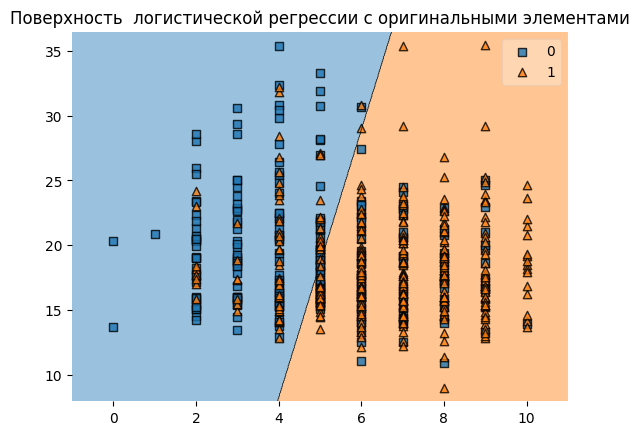

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['Alvarado_Score',	'BMI']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('Поверхность  логистической регрессии с оригинальными элементами')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

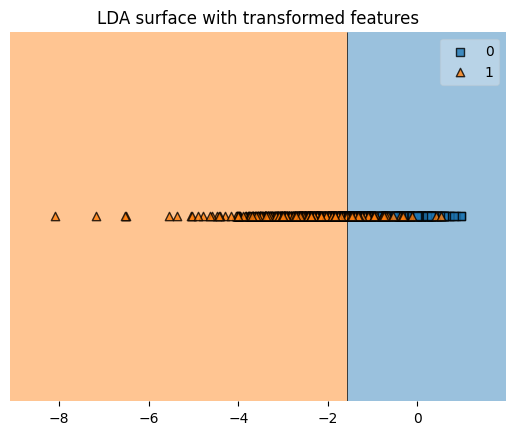

In [ ]:
dff = df.copy()
dff['Diagnosis'] = dff['Diagnosis'].map({'no appendicitis': 0, 'appendicitis': 1})

Xs = dff[['Alvarado_Score', 'BMI']]
ys = dff['Diagnosis'].values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

In [ ]:
predicted = sk_lda2.predict(X1_lda_test)

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


accuracy = metrics.accuracy_score(y1_test, predicted)

recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))


Recall (all 1s predicted right): 0.77
Precision (confidence when predicting a 1): 0.78
Detail:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        77
           1       0.76      0.88      0.81       100

    accuracy                           0.77       177
   macro avg       0.78      0.76      0.76       177
weighted avg       0.78      0.77      0.77       177



# Пример2

In [102]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OrdinalEncoder
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets
df = pd.concat([X.iloc[:, :9], y['Diagnosis']], axis=1)
df.head(10)

df = df.dropna(how='any')#удаление строкис пустым признаком

In [103]:
#Проверка признака на категориальность


def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

Словарь: {признак : кат}

In [104]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}

In [105]:

heatmap = df.isnull()

Проходим по столбцам, и меняем значения:<br>
если столбец числовой:<br>
    пишем 0.5, если значение False<br>
    пишем 1,   если значение True<br>

 если столбец категориальный
    пишем 0, если значение False<br>
    пишем 1,   если значение True

После этого у нас окажется, что значения могут принимать всего три различных значения.

In [106]:
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

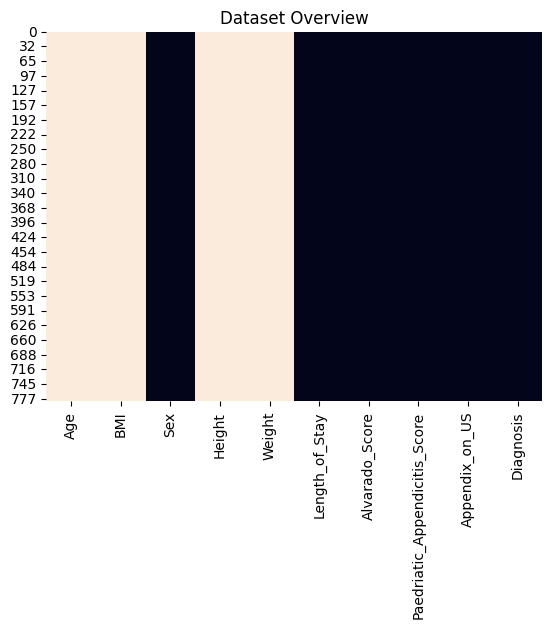

 Categerocial   Numeric   Nan 


In [107]:

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;47m Numeric ", "\033[1;30;41m Nan ")

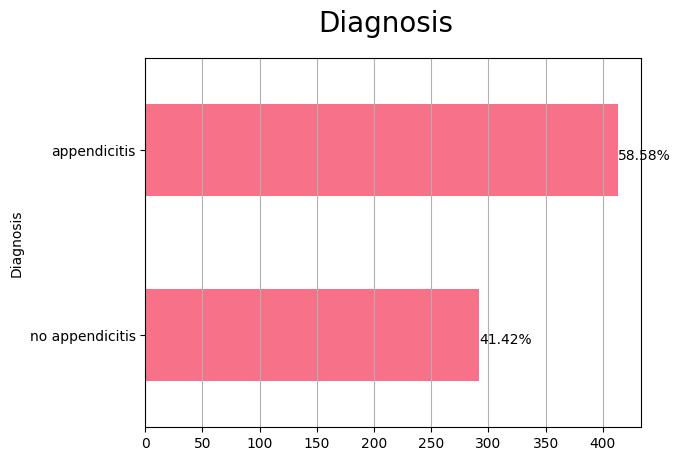

In [108]:
y ="Diagnosis"

ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

<ipython-input-109-59cd60111329>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


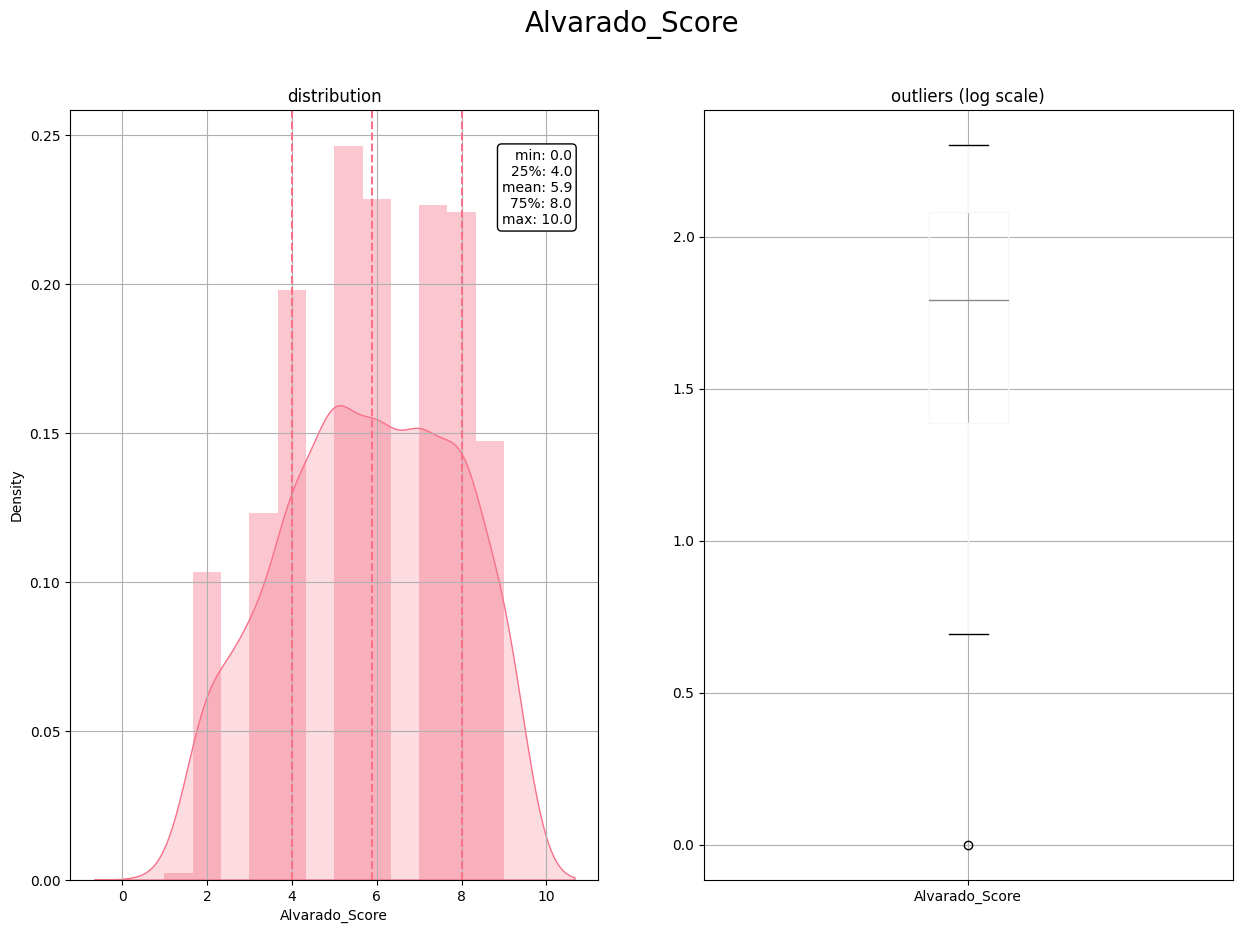

In [109]:
x = "Alvarado_Score"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)

ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable <
                                               breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])

plt.show()

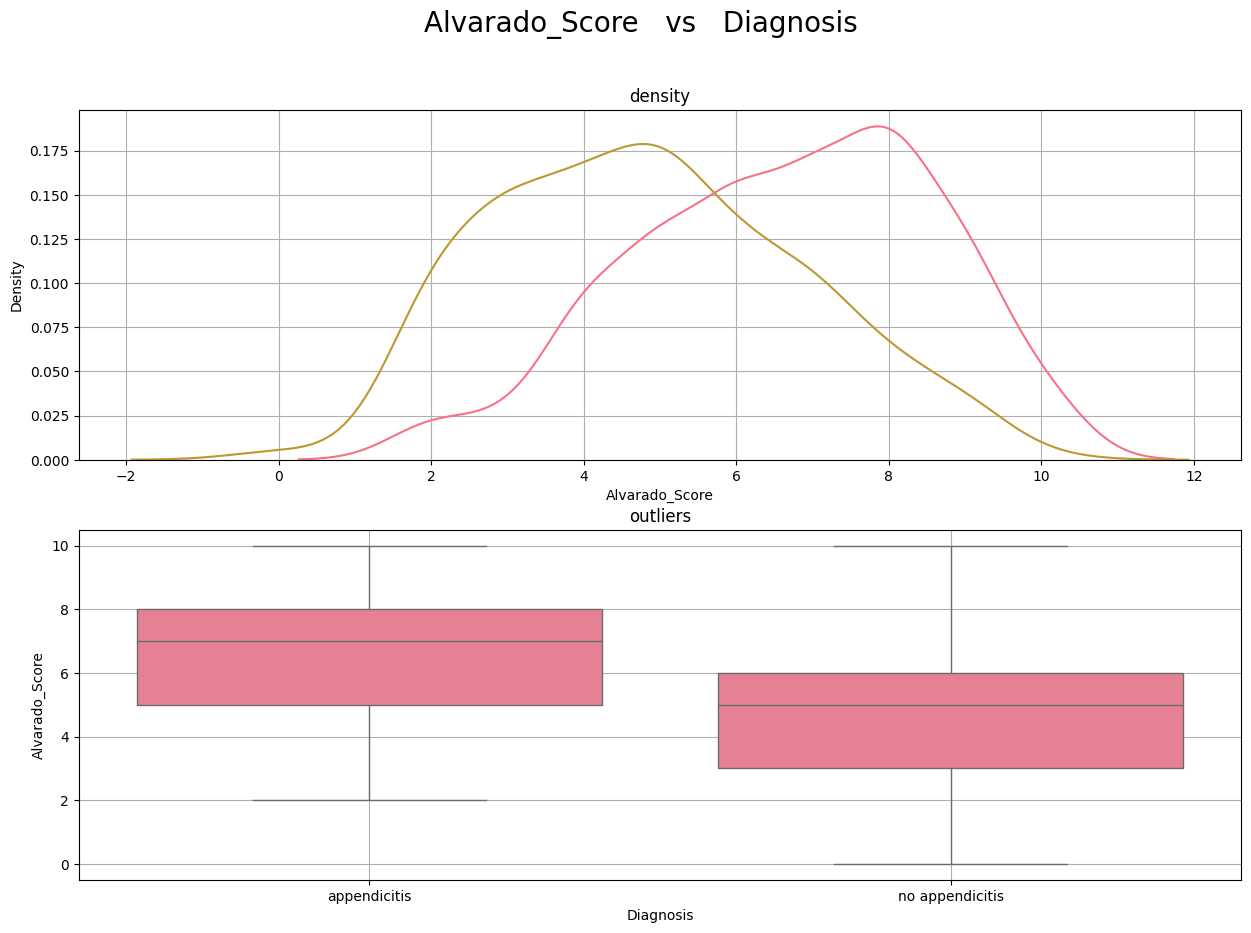

In [110]:
#Для того, чтобы понять, обладает ли  "Alvarado_Scor" предсказательной силой для предсказания"Diagnosi", построим график плотности распределений и усиковую диаграмму body_mass_g  для каждого уникального species.

x = 'Alvarado_Score'
cat, num = "Diagnosis", "Alvarado_Score"
fig, ax = plt.subplots(nrows=2, ncols=1,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x+"   vs   "+y, fontsize=20)

ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.kdeplot(df[df[cat]==i][num],   label=i, ax=ax[0])
ax[0].grid(True)

ax[1].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df, ax=ax[1])

ax[1].grid(True)

plt.show()

In [111]:
def prep(df):

    df.loc[df.Diagnosis == 'appendicitis', 'Diagnosis_'] = 1
    df.loc[df.Diagnosis == 'no appendicitis', 'Diagnosis_'] = 0
    df.loc[df.Appendix_on_US == 'no', 'Appendix_on_US_'] = 0
    df.loc[df.Sex == 'male', 'Appendix_on_US_'] = 1
    df.loc[df.Sex == 'male', 'Sex_'] = 1
    df.loc[df.Sex == 'female', 'Sex_'] = 0

    emdf = df.dropna(axis=0, how='any', inplace=False)
    return  emdf

In [112]:
## split data , 70% - тренировочная выборка, 30% тестовая выборка
df_tr, df_t = model_selection.train_test_split(df, test_size=0.3)

# подготавливаем данные в трейне и тесте одинаково
df_train = prep(df_tr)
df_test = prep(df_t)


In [113]:
df_train.shape

(357, 13)

In [114]:
train_x = df_train[['Age',	'BMI',	'Sex_',	'Height',	'Weight', 'Length_of_Stay',	'Alvarado_Score',	'Paedriatic_Appendicitis_Score',	'Appendix_on_US_'	 ]]
train_y = df_train['Diagnosis_']

In [115]:
x_test = df_train[['Age',	'BMI',	'Sex_',	'Height',	'Weight', 'Length_of_Stay',	'Alvarado_Score',	'Paedriatic_Appendicitis_Score',	'Appendix_on_US_'	 ]]
y_test= df_train['Diagnosis_']

In [117]:
Y = 'Diagnosis_'

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(train_x)

train_x_scaled = pd.DataFrame(X, columns=train_x.columns,index=train_x.index )
train_y_scaled = train_y

train_x_scaled.head()

,Age,BMI,Sex_,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US_
496,0.277684,0.245631,0.0,0.359606,0.109890,0.20,0.777778,0.888889,0.0
462,0.714446,0.240026,0.0,0.719212,0.274725,0.00,0.444444,0.222222,0.0
88,0.595278,0.295747,1.0,0.556650,0.230769,0.10,0.555556,0.555556,1.0
461,0.281057,0.270030,0.0,0.221675,0.065934,0.10,0.555556,0.444444,0.0
473,0.883642,0.399934,0.0,0.812808,0.472527,0.05,0.111111,0.000000,0.0


<ipython-input-118-59cd60111329>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


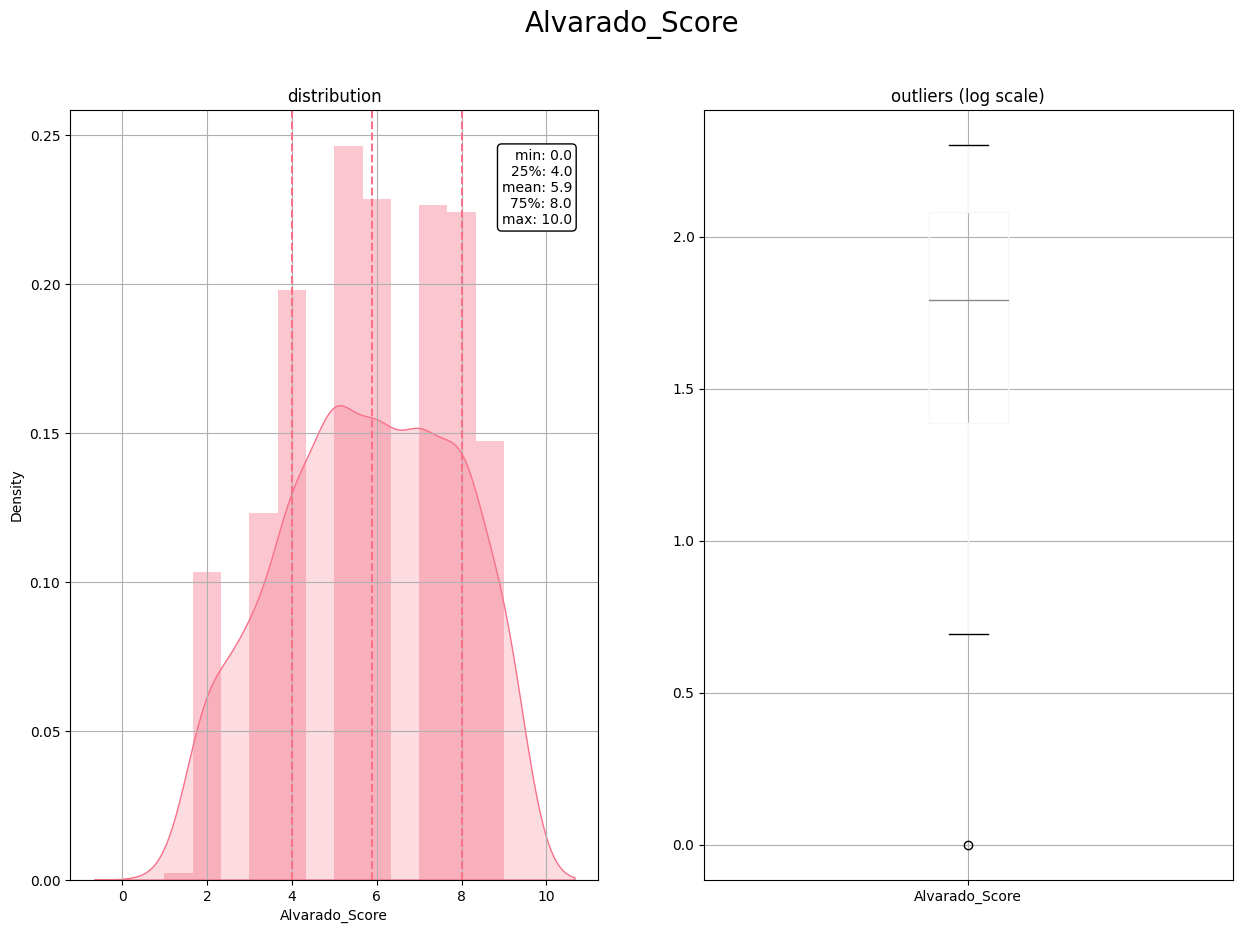

In [118]:
x = "Alvarado_Score"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)

ax[0].title.set_text('distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable <
                                               breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])

plt.show()

In [119]:
X

array([[0.27768409, 0.24563139, 0.        , ..., 0.77777778, 0.88888889,
        0.        ],
       [0.71444632, 0.24002638, 0.        , ..., 0.44444444, 0.22222222,
        0.        ],
       [0.59527825, 0.29574679, 1.        , ..., 0.55555556, 0.55555556,
        1.        ],
       ...,
       [0.51208544, 0.5324761 , 0.        , ..., 0.33333333, 0.33333333,
        0.        ],
       [0.71725689, 0.33794923, 1.        , ..., 0.77777778, 0.55555556,
        1.        ],
       [0.72119168, 0.27002967, 1.        , ..., 0.77777778, 0.55555556,
        1.        ]])

In [120]:
train_x.index

Index([496, 462,  88, 461, 473, 624, 241, 569, 258, 582,
       ...
       351, 580, 369, 531, 634, 253, 174, 404, 632, 528],
      dtype='int64', length=357)

In [121]:
X = scaler.fit_transform(x_test)

test_x_scaled = pd.DataFrame(X, columns=x_test.columns,index=x_test.index )
test_y_scaled = y_test

Text(0.5, 1.0, 'pearson correlation')

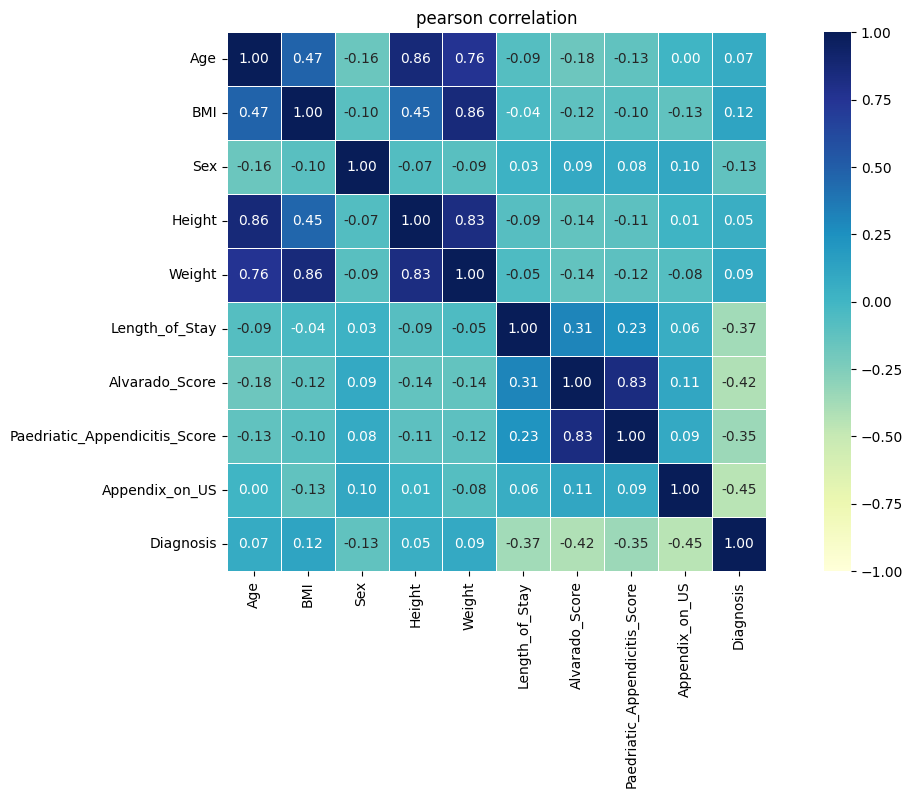

In [122]:
corr_matrix = df.copy()
plt.figure(figsize=(15,7),dpi=100)

for col in corr_matrix.columns:
  if corr_matrix[col].dtype == "O":
        corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("pearson correlation")

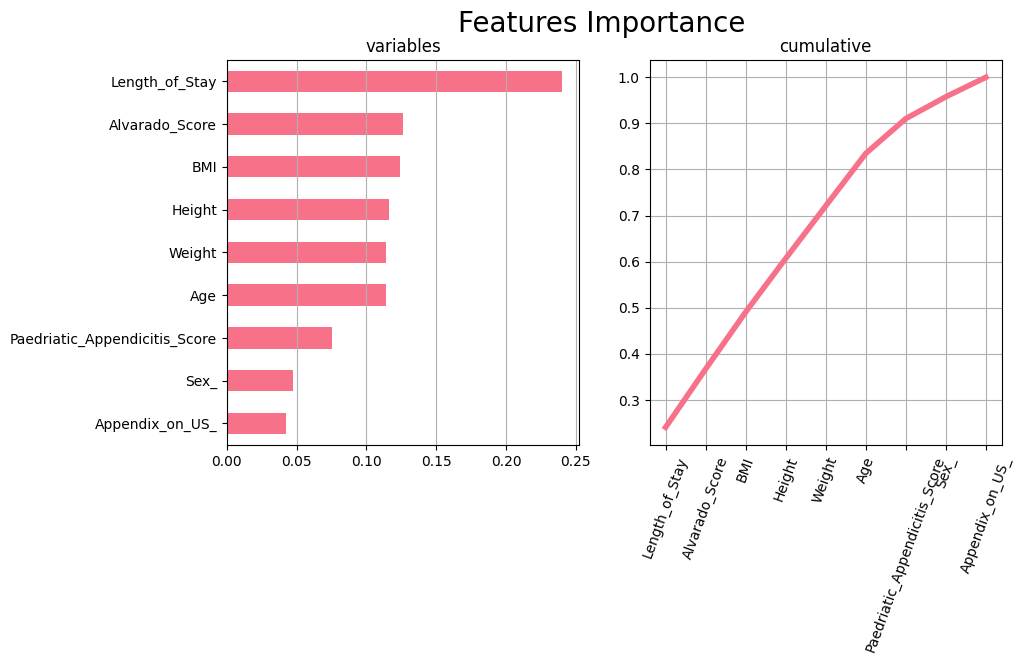

In [123]:
X = train_x_scaled.values
y = train_y_scaled.values
feature_names = train_x_scaled.columns.tolist()# имена столбцов в data.
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_ #это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)# распаковываем  кортеж в переменные figи ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')# подпишем график
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')# подпишем график
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')#Настроим линии сетки.
plt.show()

In [124]:
X_train = train_x_scaled[['Length_of_Stay', 'BMI', 'Age', 'Alvarado_Score']]
y_train = train_y_scaled

X_test = test_x_scaled[['Length_of_Stay', 'BMI', 'Age', 'Alvarado_Score']]
y_test = test_y_scaled

In [125]:
model = ensemble.GradientBoostingClassifier()
param_dic = {'learning_rate':[0.15,0.1,0.05],     #весовой коэффициент для поправок по новым деревьям при добавлении в модель
             'n_estimators':[100,250,500],  #количество деревьев, добавленных в модель
             'max_depth':[2,3,4,5],    #максимальная глубина дерева
             'min_samples_split':[2,4,6],    #задает минимальное количество выборок для разделения
             'min_samples_leaf':[1,3,5],     #минимальное количество выборок для формирования листа
             'max_features':[2,3,4],     #квадратный корень из функций обычно является хорошей отправной точкой
             'subsample':[0.7,0.8,0.9,1]}       #образцы, которые будут использоваться для подгонки индивидуального базового файла
## random search(Рандомизированный поиск по гиперпараметрам.)
random_search = model_selection.RandomizedSearchCV(model,
                                                   param_distributions=param_dic, n_iter=10,
                                                   scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 0.9, 'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.1}
Best Model mean accuracy: 0.7086071987480438


In [126]:

model.fit(X_train, y_train)

predicted_prob = model.predict_proba(X_test)

predicted = model.predict(X_test).astype('int32')

In [127]:
predicted_prob

array([[1.47182997e-02, 9.85281700e-01],
       [7.34635376e-01, 2.65364624e-01],
       [4.40505294e-01, 5.59494706e-01],
       [9.11199591e-01, 8.88004092e-02],
       [9.85817111e-01, 1.41828893e-02],
       [3.02036683e-02, 9.69796332e-01],
       [9.22774565e-01, 7.72254350e-02],
       [5.10120222e-03, 9.94898798e-01],
       [7.61667292e-01, 2.38332708e-01],
       [7.33420108e-03, 9.92665799e-01],
       [9.58724751e-01, 4.12752493e-02],
       [5.04946898e-02, 9.49505310e-01],
       [3.63271613e-02, 9.63672839e-01],
       [7.17071874e-01, 2.82928126e-01],
       [2.12645131e-02, 9.78735487e-01],
       [8.05566214e-01, 1.94433786e-01],
       [7.66122921e-01, 2.33877079e-01],
       [1.09310661e-01, 8.90689339e-01],
       [4.39958481e-01, 5.60041519e-01],
       [2.31663698e-01, 7.68336302e-01],
       [1.41785654e-01, 8.58214346e-01],
       [3.32999736e-03, 9.96670003e-01],
       [3.15864248e-01, 6.84135752e-01],
       [8.58426894e-01, 1.41573106e-01],
       [7.609301

In [128]:
y_test.astype('int32')

,Diagnosis_
496,1
462,0
88,1
461,0
473,0
...,...
253,1
174,0
404,0
632,1


In [129]:
y_test

,Diagnosis_
496,1.0
462,0.0
88,1.0
461,0.0
473,0.0
...,...
253,1.0
174,0.0
404,0.0
632,1.0


In [130]:

accuracy = metrics.accuracy_score(y_test, predicted)

predicted_prob = model.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, predicted_prob,  multi_class='ovo',average= "weighted")
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))


recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 1.0
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision (confidence when predicting a 1): 1.0
Detail:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       162
         1.0       1.00      1.00      1.00       195

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



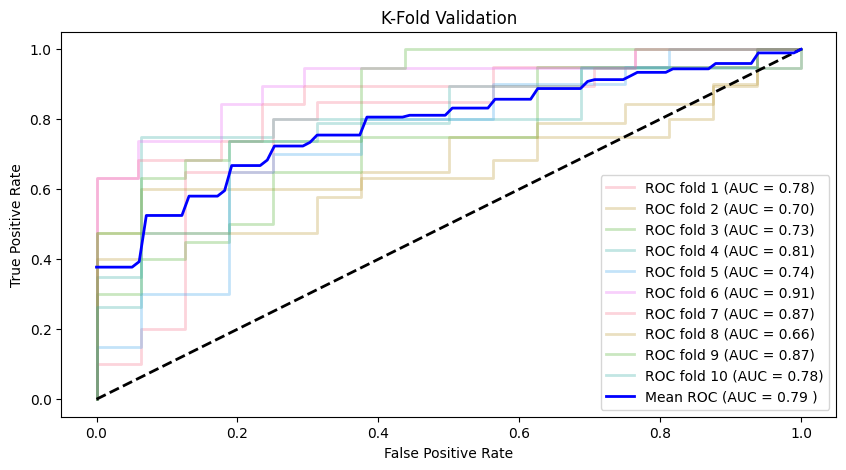

In [131]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5),dpi=100)
i = 1
for train, test in cv.split(X_train, y_train):
    X_train_selected = X_train.iloc[train]

    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1

plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()

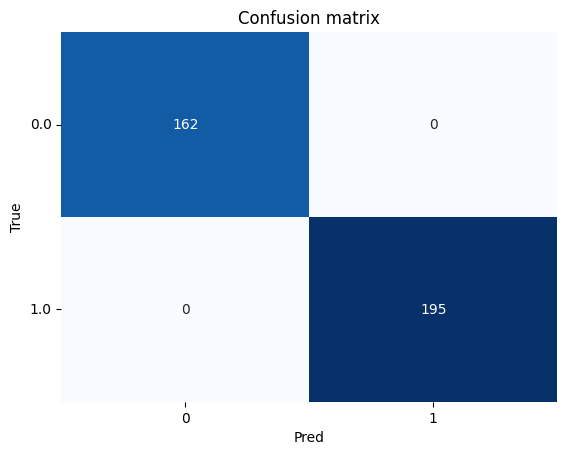

In [132]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)

plt.show()

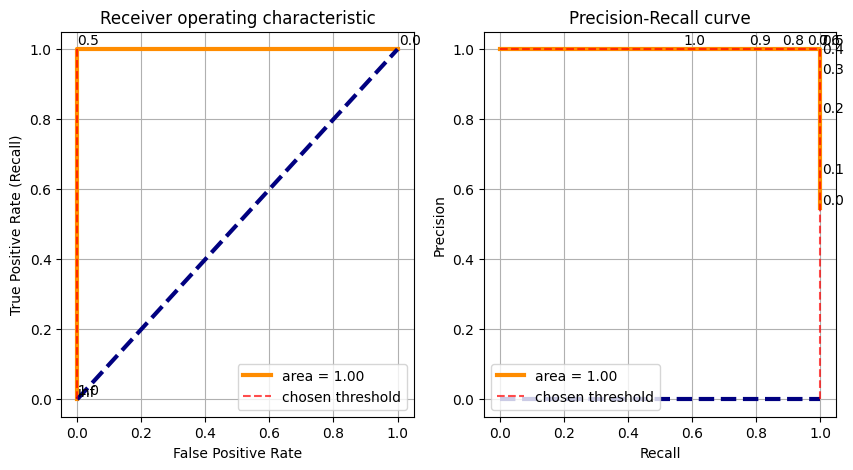

In [134]:
'''
Еще ROC кривые
'''

classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5),dpi=100)
'''

## plot ROC curve
построим кривую ROC

'''
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)


thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next


precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob, pos_label=1)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)

thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[1].annotate(np.round(t,1), xy=(recalls[i],precisions[i]),
                    xytext=(recalls[i],precisions[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
plt.show()


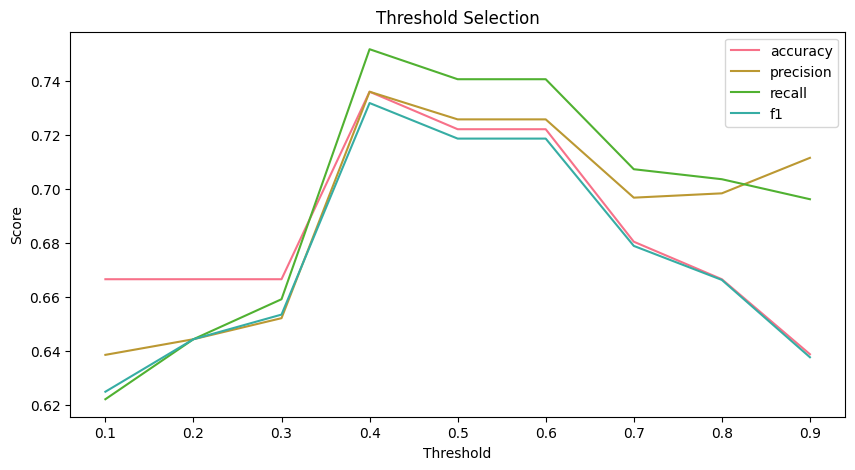

In [135]:
## calculate scores for different thresholds
'''
Определим, какие значения отсечки лучше всего для нашей модели.
Для этого построим график ("значение отсечки", "значение метрики") для каждой метрики accuracy, precision, recall, f1
'''
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))
'''
Добавим линии
'''
## plot
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)
'''
отрисовываем
'''

plt.show()